In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from bs4 import BeautifulSoup 
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
import urllib.request
np.random.seed(seed=0)

In [2]:
data = pd.read_csv('C:/Users/DELL/P1/data/Covid19.csv', nrows = 100000, encoding='cp949')
print("전체 뉴스 개수 :",(len(data)))

전체 뉴스 개수 : 100000


In [3]:
data = data[['본문', '특성추출']]
data.sample(10)

,본문,특성추출
3582,≪이 기사는 07월31일(11:10) 자본시장의 혜안 ..‘마켓인사이트’에 게재된 ...,"kcc,공모사채,부동산,kcc건설,건설업,코로나바이러스,연평균,투자가,다음달,서울,..."
60498,- .. .. .. ..［중부매일 유창림 기자］천안에 소재한 ..(주)유스바이오(대...,"코로나19,유스바이오,유창림,중부매일,박성일,서산시,지방자치단체,아이솔레이션,아이솔..."
53227,[머니투데이 구유나 기자] 현대차증권 19일 SK렌터카에 대해 법인 통합에 따른 하...,"현대차증권,렌터카,중고차,코로나19,연구원,목표주가,경쟁력,sk렌터카,박종렬,125..."
21333,[당진=충청일보 최근석 기자] 충남 당진시보건소는 코로나19 상황이 장기화되면서 이...,"코로나19,일상생활,장애인,치료사,스트레칭,관계자,보건소,재활서비스,장애인들,건강관..."
3885,전주시가 최근 운영을 재개한 경로당과 복지관 등 사회복지시설 현장을 찾아가 생활방...,"경로당,복지관,전주시,코로나19,방역수칙,만큼,이용자,민선식,장기간,노노,경로식당,..."
51521,［충북일보］ 현대엘리베이터가 최근 집중 호우로 큰 피해를 입은 충주시 이재민을 돕기...,"현대엘리베이터,충주,집중호우,충주시,이재민,송승봉,코로나19,임직원,일상생활,가전제..."
84261,[고성]고성군은 코로나19 여파로 지난해까지 집합교육만 실시하던 4대 폭력 예방교육...,"코로나19,고성군,예방교육,집합교육,사이버교육,온라인,기본법,성폭력,양성평등기본법,..."
10685,[충청투데이 이대현 기자] 제천시 노사민정협의회가 제천시 협의회 사무국에서 노사민정...,"협의회,노사민정,제천시,관계자,실무협의회,기경희,코로나,거버넌스,고용안정,일자리,협..."
59948,한국기원 공식 프로기전의 온라인 대국에서 기기 오류로 대국 자체가 무효 처리돼 재대...,"9단,재대국,한국기원,중국,중국기원,농심신,온라인,시간패,박정환,한국,일본,이창호,..."
41032,전광훈 목사가 이끌고 있는 사랑제일교회에 대한 비판이 커지고 있다... .. .. ...,"서울,코로나19,사랑제일교회,광화문,제일교회,전광훈,확진자,동화면세점,코로나,집단감..."


In [4]:
print('본문 열에서 중복을 배제한 유일한 샘플의 수 :', data['본문'].nunique())
print('특성추출 열에서 중복을 배제한 유일한 샘플의 수 :', data['특성추출'].nunique())

본문 열에서 중복을 배제한 유일한 샘플의 수 : 93394
특성추출 열에서 중복을 배제한 유일한 샘플의 수 : 94903


In [5]:
data.drop_duplicates(subset=['본문'], inplace=True)
print("샘플 수 :", len(data))

샘플 수 : 93395


In [6]:
print(data.isnull().sum())

본문      1
특성추출    1
dtype: int64


In [7]:
data.dropna(axis=0, inplace=True)
print('전체 샘플 수 :',(len(data)))

전체 샘플 수 : 93394


본문의 최소 길이 : 1
본문의 최대 길이 : 62
본문의 평균 길이 : 42.44226609846457
키워드의 최소 길이 : 1
키워드의 최대 길이 : 14
키워드의 평균 길이 : 1.0041865644473948


C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52628 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 47928 missing from current

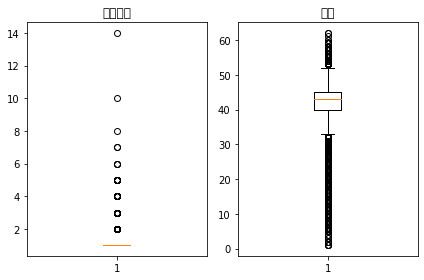

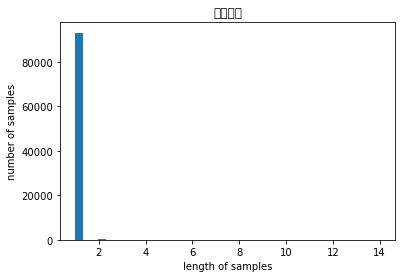

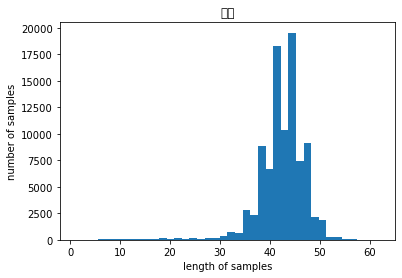

In [8]:
# 길이 분포 출력
text_len = [len(s.split()) for s in data['본문']]
keyword_len = [len(s.split()) for s in data['특성추출']]

print('본문의 최소 길이 : {}'.format(np.min(text_len)))
print('본문의 최대 길이 : {}'.format(np.max(text_len)))
print('본문의 평균 길이 : {}'.format(np.mean(text_len)))
print('키워드의 최소 길이 : {}'.format(np.min(keyword_len)))
print('키워드의 최대 길이 : {}'.format(np.max(keyword_len)))
print('키워드의 평균 길이 : {}'.format(np.mean(keyword_len)))

plt.subplot(1,2,1)
plt.boxplot(keyword_len)
plt.title('특성추출')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('본문')
plt.tight_layout()
plt.show()

plt.title('특성추출')
plt.hist(keyword_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('본문')
plt.hist(text_len, bins=40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [9]:
text_max_len = 50
keyword_max_len = 8

In [10]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s.split()) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [11]:
below_threshold_len(text_max_len, data['본문'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.9867871597747179


In [12]:
below_threshold_len(keyword_max_len, data['특성추출'])

전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9999785853480951


In [13]:
data = data[data['본문'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['특성추출'].apply(lambda x: len(x.split()) <= keyword_max_len)]
print('전체 샘플 수 :',(len(data)))

전체 샘플 수 : 92158


In [14]:
data.head()

,본문,특성추출
0,의왕시는 코로나 19 장기화로 진로체험 및 문화 활동이 어려운 청소년들을 위해 진로...,"의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김상돈,유튜브,트롯..."
1,코로나19 가짜뉴스 대책단(백종덕ㆍ최정민ㆍ서성민 변호사 공동단장)이 지난 29일 이...,"이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,온라인,살해설,조..."
2,"지금까지와는 전혀 다른 언택트 시대가 다가오면서, 마케팅 업계에도 변화의 바람이 불...","오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아"
3,[앵커] ..프로야구에 이어 프로축구도 코로나 19 사태 뒤 처음으로 관중 입장이 ...,"팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2칸,엄원,모라이스..."
4,[앵커] ..전세계적으로 재확산 중인 코로나19가 진정될 조짐을 안 보이는 가운데 ...,"미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입도선매,사람들,임..."


In [15]:
# 요약 데이터에는 시작 토큰과 종료 토큰을 추가한다.
data['decoder_input'] = data['특성추출'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['특성추출'].apply(lambda x : x + ' eostoken')
data.head()

,본문,특성추출,decoder_input,decoder_target
0,의왕시는 코로나 19 장기화로 진로체험 및 문화 활동이 어려운 청소년들을 위해 진로...,"의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김상돈,유튜브,트롯...","sostoken 의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김...","의왕시,온라인,실시간,의왕,가요제,엔터테이너,dream,오프라인,김상돈,유튜브,트롯..."
1,코로나19 가짜뉴스 대책단(백종덕ㆍ최정민ㆍ서성민 변호사 공동단장)이 지난 29일 이...,"이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,온라인,살해설,조...","sostoken 이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,...","이재명,가짜뉴스,악의적,공동단장,백종덕,허위사실,코로나19,90건,온라인,살해설,조..."
2,"지금까지와는 전혀 다른 언택트 시대가 다가오면서, 마케팅 업계에도 변화의 바람이 불...","오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아","sostoken 오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아","오프라인,모츠,한국,온라인,런칭,전문가,언택트,캐롯닷밀,뉴딜,엘튼,조슈아 eostoken"
3,[앵커] ..프로야구에 이어 프로축구도 코로나 19 사태 뒤 처음으로 관중 입장이 ...,"팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2칸,엄원,모라이스...","sostoken 팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2...","팬들,경기장,광주도,선수들,역전승,최용수,전북도,양시창,전후좌우,2칸,엄원,모라이스..."
4,[앵커] ..전세계적으로 재확산 중인 코로나19가 진정될 조짐을 안 보이는 가운데 ...,"미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입도선매,사람들,임...","sostoken 미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입...","미국,코로나19,제약사,사노피,유럽연합,행정부,유럽,상용화,5억,입도선매,사람들,임..."


In [16]:
encoder_input = np.array(data['본문'])
decoder_input = np.array(data['decoder_input'])
decoder_target = np.array(data['decoder_target'])

In [17]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[52963 17225 18121 ... 84389 26023  1298]


In [18]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [19]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :',n_of_val)

테스트 데이터의 수 : 18431


In [20]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 73727
훈련 레이블의 개수 : 73727
테스트 데이터의 개수 : 18431
테스트 레이블의 개수 : 18431


In [21]:
src_tokenizer = Tokenizer()
src_tokenizer.fit_on_texts(encoder_input_train)

In [22]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율 :", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 361204
등장 빈도가 6번 이하인 희귀 단어의 수 : 317741
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : 43463
단어 집합에서 희귀 단어의 비율 : 87.96718751730324
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 17.664862369238886


In [23]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words = src_vocab) 
src_tokenizer.fit_on_texts(encoder_input_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

In [24]:
print(encoder_input_train[:3])

[[33, 372, 1218, 1189, 126, 10, 2818, 1403, 396, 3061, 51, 27, 146, 62, 2007, 3, 1199, 6767, 492, 27, 146], [1325, 109, 2103, 540, 49, 160, 56, 122, 3036, 125, 15, 2103, 56, 122, 2458, 5058, 2819, 1749], [19, 144, 242, 628, 2289, 1458, 391, 160, 35, 2900, 590, 1063, 3262, 1219, 101, 207, 27, 3097, 276, 206, 368, 37]]


In [25]:
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [26]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수 : %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율 :", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율 :", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 166170
등장 빈도가 5번 이하인 희귀 단어의 수 : 138533
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 : 27637
단어 집합에서 희귀 단어의 비율 : 83.36823734729494
전체 등장 빈도에서 희귀 단어 등장 빈도 비율 : 13.857683434408482


In [27]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words = tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

In [28]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

In [29]:
print(decoder_input_train[:5])

[[2, 176, 1776, 806, 870, 294, 137, 1, 480, 1138, 1929, 1369, 638, 12, 125, 54, 726, 119, 11], [2, 390, 880, 943, 1424, 1579], [2, 617, 5, 12, 10, 4, 92, 199, 95], [2, 699, 727, 778, 1777, 1009, 1557, 830, 1263, 1317, 1664, 11, 1730, 1439, 1, 191], [2, 1, 1505, 459, 482, 7, 140, 107, 249, 1252, 24, 94]]


In [30]:
print(decoder_target_train[:5])

[[176, 1776, 806, 870, 294, 137, 1, 480, 1138, 1929, 1369, 638, 12, 125, 54, 726, 119, 11, 3], [390, 880, 943, 1424, 1579, 3], [617, 5, 12, 10, 4, 92, 199, 95, 3], [699, 727, 778, 1777, 1009, 1557, 830, 1263, 1317, 1664, 11, 1730, 1439, 1, 191, 3], [1, 1505, 459, 482, 7, 140, 107, 249, 1252, 24, 94, 3]]


In [31]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

In [32]:
print('삭제할 훈련 데이터의 개수 :',len(drop_train))
print('삭제할 테스트 데이터의 개수 :',len(drop_test))

삭제할 훈련 데이터의 개수 : 77
삭제할 테스트 데이터의 개수 : 24


In [33]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :',len(decoder_input_train))
print('테스트 데이터의 개수 :',len(encoder_input_test))
print('테스트 레이블의 개수 :',len(decoder_input_test))

훈련 데이터의 개수 : 73650
훈련 레이블의 개수 : 73650
테스트 데이터의 개수 : 18407
테스트 레이블의 개수 : 18407


In [34]:
encoder_input_train = pad_sequences(encoder_input_train, maxlen = text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen = text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen = keyword_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen = keyword_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen = keyword_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen = keyword_max_len, padding='post')

In [35]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [36]:
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [37]:
# 디코더
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences = True, return_state = True, dropout = 0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state = [state_h, state_c])

In [38]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation = 'softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [39]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [40]:
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis = -1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
_______________________________________________________________________________________

In [41]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')

In [42]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 2)
history = model.fit(x = [encoder_input_train, decoder_input_train], y = decoder_target_train, \
          validation_data = ([encoder_input_test, decoder_input_test], decoder_target_test),
          batch_size = 256, callbacks=[es], epochs = 10)

Epoch 1/10
288/288 [==============================] - 6680s 23s/step - loss: 5.6188 - val_loss: 5.1703
Epoch 2/10
288/288 [==============================] - 5000s 17s/step - loss: 5.0285 - val_loss: 4.8852
Epoch 3/10
288/288 [==============================] - 37594s 131s/step - loss: 4.8021 - val_loss: 4.7167
Epoch 4/10
288/288 [==============================] - 11871s 41s/step - loss: 4.6522 - val_loss: 4.6179
Epoch 5/10
288/288 [==============================] - 3318s 12s/step - loss: 4.5409 - val_loss: 4.5416
Epoch 6/10
288/288 [==============================] - 3334s 12s/step - loss: 4.4493 - val_loss: 4.4965
Epoch 7/10
288/288 [==============================] - 3296s 11s/step - loss: 4.3724 - val_loss: 4.4558
Epoch 8/10
288/288 [==============================] - 4243s 15s/step - loss: 4.3062 - val_loss: 4.4252
Epoch 9/10
288/288 [==============================] - 4009s 14s/step - loss: 4.2445 - val_loss: 4.4054
Epoch 10/10
288/288 [==============================] - 4200s 15s/step 

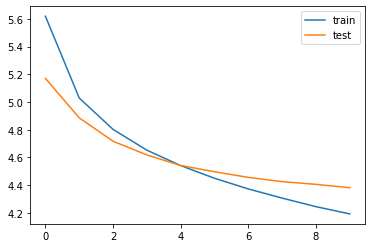

In [43]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [44]:
src_index_to_word = src_tokenizer.index_word # 원문 단어 집합에서 정수 -> 단어를 얻음
tar_word_to_index = tar_tokenizer.word_index # 키워드 단어 집합에서 단어 -> 정수를 얻음
tar_index_to_word = tar_tokenizer.index_word # 키워드 단어 집합에서 정수 -> 단어를 얻음

In [45]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

In [46]:
# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)
# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

In [47]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [48]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if(sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (keyword_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

In [49]:
# 본문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if(i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 키워드의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2keyword(input_seq):
    temp=''
    for i in input_seq:
        if((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [54]:
for i in range(20, 30):
    print("본문 :",seq2text(encoder_input_test[i]))
    print("실제 키워드 :",seq2keyword(decoder_input_test[i]))
    print("예측 키워드 :",decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

본문 : 신종 코로나바이러스 감염증 코로나19 재확산 사태의 중심에 선 사랑제일교회 측이 방역당국과 나섰다 이들은 기자회견을 통해 “정부가 코로나19를 방역 하고 있다”며 정부를 비판했다 사랑제일교회 23일 서울 성북구 사랑제일교회 앞에서 기자회견을 열고 15일 
실제 키워드 : 중대본 정세균 코로나바이러스 광화문 압수수색 코로나 기자회견 성북구 
예측 키워드 :  코로나19 확진자 확진자 코로나바이러스 변호사


본문 : 헤럴드경제 뉴스24팀 더불어민주당 김부겸 후보는 전날 당 지지율이 미래통합당에 데 대해 정말 정신을 바짝 될 때가 온 것”이라고 경고했다 김 후보는 14일 페이스북을 통해 민주당이 통합당이 너무 있다”며 김종인 대표 
실제 키워드 : 김종인 더불어민주당 페이스북 일자리 통합당 자신감 이수 지원금 
예측 키워드 :  위원장 김종인 김종인 김종인 김종인 더불어민주당


본문 : 중국의 7월 수출이 시장 전망치를 크게 최근 회복세를 보이던 다시 홍콩 가 7일 보도했다 따르면 중국 우리나라의 해당 는 7월 중국의 수출이 달러 약 로 지난해 같은 기간보다 7 2 증가했다고 전했다 
실제 키워드 : 중국 블룸버그 감소세 코로나19 상반기 우리나라 홍콩 
예측 키워드 :  중국 코로나19 미국 중국


본문 : 최근 코로나19의 수도권 중심으로 다시금 따라 기업들이 발 빠르게 재택근무 체제로 전환하고 있다 특히 많은 재택근무에 있는 카카오는 지난 14일부터 체제로 지난 19일부터 오는 28일까지 재택 
실제 키워드 : 재택근무 클라우드 코로나 기업들 장기화 최소화 코로나19 
예측 키워드 :  코로나19 확진자 확진자 관계자


본문 : lg전자 직원이 신종 코로나바이러스 감염증 코로나19 확진 판정을 받았다 lg전자는 해당 직원이 근무하는 사업장을 이번 했다 lg전자 등에 따르면 20일 서울 금천구 근무하는 직원 1명이 코로나19 확진 판정을 받았다 
실제 키워드 : 사업장 직원 검사 근무 건물 주말 폐쇄 밀접 
예측 키워드 :  코로나19 확진자 확